# Day 16 Workout - Bivariate Viz NN

Using the IMDB dataset, create a scatterplot of movies with Metascore on the x-axis and Revenue on the y-axis.

- The title for the graph should be “Metascore by Revenue”.

- The x label should be “Metascore”.

- The y label should be “Revenue (Millions)”.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/imdb_cleaned.csv')


In [2]:
df.columns

Index(['Unnamed: 0', 'Rank', 'Title', 'Genre', 'Description', 'Director',
       'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes',
       'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Sci-Fi',
       'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family',
       'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Crime',
       'Western', 'War', 'Musical', 'Sport'],
      dtype='object')

Text(0, 0.5, 'Revenue (Millions)')

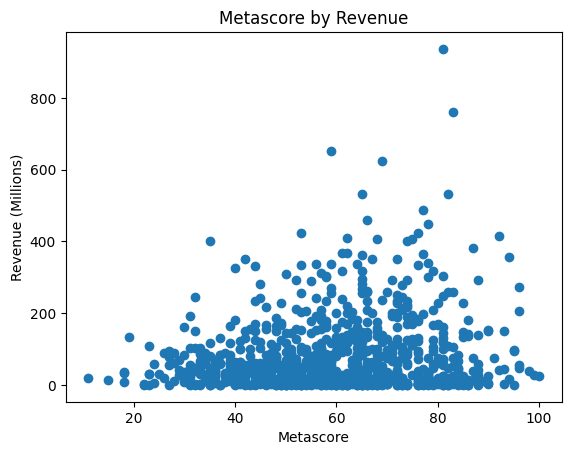

In [3]:
plt.scatter(df.Metascore, df['Revenue (Millions)'])
plt.title('Metascore by Revenue')
plt.xlabel('Metascore')
plt.ylabel('Revenue (Millions)')

Add a trendline to the scatterplot above. Also, add the linear regression formula in the plot area.

In [4]:
df['Revenue (Millions)']

0      333.13
1      126.46
2      138.12
3      270.32
4      325.02
        ...  
995       NaN
996     17.54
997     58.01
998       NaN
999     19.64
Name: Revenue (Millions), Length: 1000, dtype: float64

100.0
0.8779488330688472
32.260599591731356
0.1423968811831741
0.21106550932626608


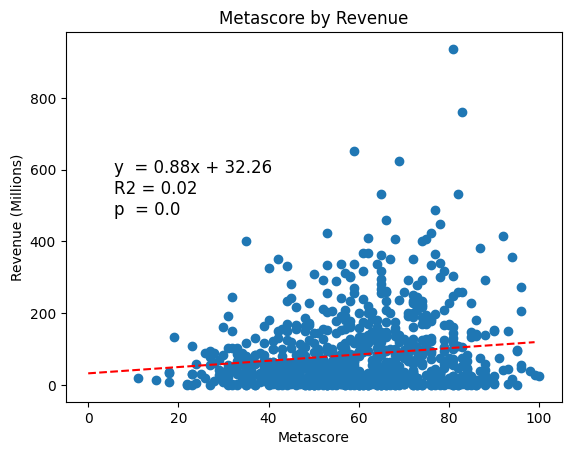

In [15]:
from scipy import stats

df.dropna(inplace=True)

plt.scatter(df.Metascore, df['Revenue (Millions)'])
plt.title('Metascore by Revenue')
plt.xlabel('Metascore')
plt.ylabel('Revenue (Millions)')

# Calculate the regression line
m, b, r, p, err = stats.linregress(df.Metascore, df['Revenue (Millions)'])

# Create the index used for the line plot by using the range function from 
# zero to the max value of the numeric feature
num = df.Metascore.max()
print(num)
print(m)
print(b)
print(r)
print(err)

nums = range(int(num))

# This line plot requires(index list, slope * index list + y-intercept, line format)
# For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
plt.plot(nums,m * nums + b,"r--")
textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
textstr += 'R2 = ' + str(round(r**2, 2)) + '\n'
textstr += 'p  = ' + str(round(p, 4))
plt.text(.2, 0.5, textstr, fontsize=12, transform=plt.gcf().transFigure)
plt.show()

Is there an issue with heteroscedasticity between these two variables?

In [18]:
df.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the OLS model
model = ols(formula='Revenue~Metascore', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

,LM stat,LM p-value,F-stat,F p-value
White,16.166,0.0,8.212,0.0
Breusch-Pagan,16.164,0.0,16.442,0.0
